<a href="https://colab.research.google.com/github/titocampos/estudo-crm/blob/master/Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron

Um sistema (hardware ou software) que recebe um ou mais valores de entrada, executa uma função na soma ponderada das entradas e calcula um único valor de *saída*. No aprendizado de máquina, esta função geralmente é não-linear, como ReLU, sigmoid ou tanh. Na figura temos a representação de um perceptron:

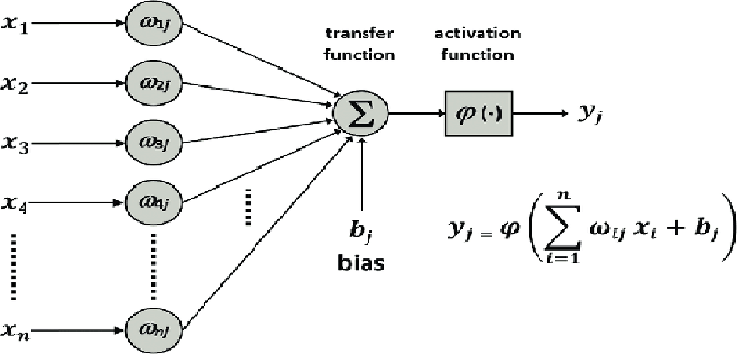

Um perceptron só pode aprender problemas simples. Ele pode traçar um hiperplano no espaço padrão e mover o plano até que o erro seja reduzido. Infelizmente, isso só é útil se o problema for linearmente separável. Um problema linearmente separável é aquele em que as classes podem ser separadas por um único hiperplano.

Um problema que pode ser resolvido por um perceptron é a porta E. Como você sabe que uma porta E produz uma saída como 1 se ambas as entradas forem 1 e 0 em todos os outros casos. Portanto, um perceptron pode ser usado como um separador ou uma linha de decisão que divide o conjunto de entradas em duas classes:

Classe 1: Entradas com saída como 0 que fica abaixo da linha de decisão.
Classe 2: Entradas com saída 1 que fica acima da linha de decisão ou separador.
O diagrama abaixo mostra a idéia acima de um classificar as entradas do tipo E usando um perceptron

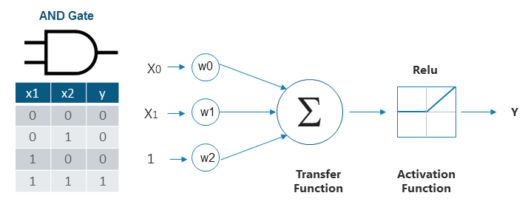

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

data = np.array([[0,0,1], [0,1,1],[1,0,1], [1,1,1]])
labels = np.array([[0], [0], [0], [1]])

w = tf.Variable(tf.random_normal([3, 1], seed=12))
x = tf.placeholder(tf.float32,[None,3])
y = tf.placeholder(tf.float32,[None,1])

output = tf.nn.relu(tf.matmul(x, w))

## Treinamento

Pronto temos nosso neurônio montado, mas ele não nos serve de nada enquanto não aprender os pesos necessários para a solução do problema proposto, e isto será aprendido durante a etapa de treinamento. No código abaixo utilizamos Mean Squared Error para mensurar o erro do treinamento e Gradient Descent para minimizar este erro.

In [0]:
loss = tf.reduce_sum(tf.square(output - y))
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(10001):
  sess.run(train, {x:data,y:labels})
  cost = sess.run(loss,feed_dict={x:data,y:labels})
  if (i % 1000 == 0):
    print('Epoch--',i,'--loss--',cost)
weights = w.eval(sess)
print('\nFinal weights:', weights)     

Epoch-- 0 --loss-- 1.0396416
Epoch-- 1000 --loss-- 0.0003605077
Epoch-- 2000 --loss-- 3.7268623e-07
Epoch-- 3000 --loss-- 4.2871307e-10
Epoch-- 4000 --loss-- 3.7747583e-11
Epoch-- 5000 --loss-- 3.7747583e-11
Epoch-- 6000 --loss-- 3.7747583e-11
Epoch-- 7000 --loss-- 3.7747583e-11
Epoch-- 8000 --loss-- 3.7747583e-11
Epoch-- 9000 --loss-- 3.7747583e-11
Epoch-- 10000 --loss-- 3.7747583e-11

Final weights: [[ 0.99999255]
 [ 0.99999255]
 [-0.99998957]]


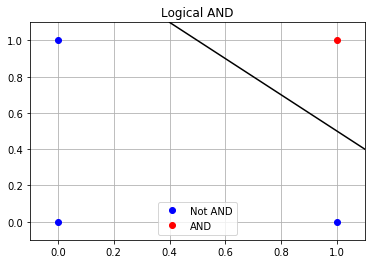

In [80]:
figure, axe = plt.subplots()
plt.grid(True)
axe.set_xlim((-.1, 1.1))
axe.set_ylim((-.1, 1.1))
axe.plot([0,0,1], [0, 1, 0], "bo", label="Not AND")
axe.plot([1], [1], "ro", label="AND")
axe.plot([0.4, 1.1], [1.1, 0.4], "k")
axe.set_title("Logical AND")
legend = axe.legend()

## O problema XOR
Nem sempre um problema é linearmente separável. Para resolver estes casos usamos um Perceptron de várias camadas (MLP), em que uma camada é inserida na próxima. O problema mais simples que não pode ser resolvido por um simples perceptron é o OU exclusivo. Para duas entradas x1 e x2, a saída é verdadeira apenas se uma das entradas for verdadeira. Na figura abaixo temos a representação dessa rede.

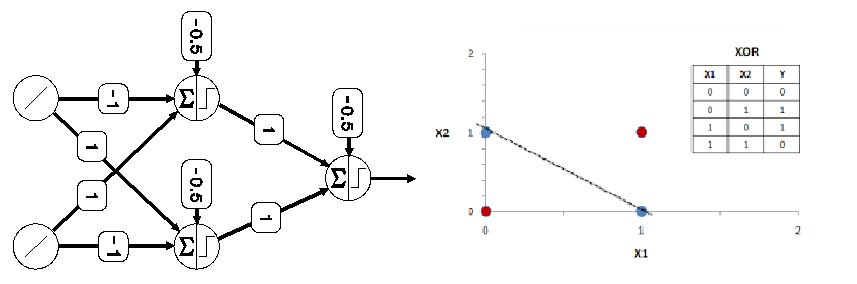

https://developers.google.com/machine-learning/glossary/?hl=pt_br#c